## R - basics

## R Data Structures
Way of organizing data to reduce space and complexity of different tasks. 
1. Vectors
2. Lists
3. Matrices
4. Arrays
5. Dataframes
6. Factors

### 1. Vectors
Very basic one dimensional data collection type in R. All elements must be of identical data type.

In [1]:
# try

vec1 = c(1, 2, 3)
vec2 = c('3', '4', '5')
vec = c(vec1, vec2)
print(class(vec1))
print(class(vec2))
print(class(vec))
print('____________')

vec1 = as.integer(c(1, 2, 3))
typeof(vec1[0])
vec2 = c(1.1, 2.1, 3.1)
vec = c(vec1, vec2)

# ask what type are the vector elements
is.integer(vec[0])
typeof(vec[0])

[1] "numeric"
[1] "character"
[1] "character"
[1] "____________"


[1] "integer"

[1] FALSE

[1] "double"

### 2. Lists
List of ordered collection of objects. Compared to vectors they are heterogenous; elements can be of different data types. Similar to vectors, lists are one dimensional. But they can consists of numbers, characters, vectors, matrices or even functions.

In [2]:
spec_id <- c(1, 2, 3)
species <- c('dog', 'cat', 'horse')

spec_list <- list(spec_id, species)
spec_list

print(class(spec_list))

[[1]]
[1] 1 2 3

[[2]]
[1] "dog"   "cat"   "horse"

[1] "list"


### 3. Matrices
Arangment of rows and columns to two dimensional rectangular object, similar to those in mathematics. They contain homogenous data.
#### Syntax matrix(data, nrow, ncol, byrow)

In [3]:
mat = matrix(
            1:6,                  # c(..), n:k, etc
            nrow=2, ncol=3,
            byrow=TRUE            # default matrices ordering is by column wise, byrow change the arangement of the matrix
            ) 
print(mat)

     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6


In [4]:
# Install benchmarking package
install.packages("microbenchmark")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
# how to access R help documentation
# operator '::'' access the exact function from a specific package. 
help('::')

In [6]:
mbm = microbenchmark::microbenchmark(
                              by_col = matrix(1:1e5, nrow = 1000),
                              by_row = matrix(1:1e5, nrow = 1000, byrow = TRUE),
                              times = 10
                              )
print(mbm)

Unit: microseconds
   expr     min       lq      mean   median       uq      max neval
 by_col 200.648  349.870  353.5851  364.247  386.106  408.947    10
 by_row 846.372 1027.291 1060.7014 1101.043 1122.716 1144.064    10


#### Useful matrix functions
- dim()
- nrow()
- ncol()
- cbind()
- rbind()
- dimnames(mat) <- list(,) # Naming the rows and columns

In [8]:
mat <- matrix(1:6, nrow=2, ncol=3)
dimnames(mat) <- list(c('row 1', 'row 2'), c('col 1', 'col 2', 'col 3'))
print(mat)
# attributes() prints information about matrix dimensions and also about rows and columns names
attributes(mat)

      col 1 col 2 col 3
row 1     1     3     5
row 2     2     4     6


$dim
[1] 2 3

$dimnames
$dimnames[[1]]
[1] "row 1" "row 2"

$dimnames[[2]]
[1] "col 1" "col 2" "col 3"

In [9]:
# R can solve the number of rows 
matrix(1:12, ncol = 3)
matrix(1:12, nrow = 4, ncol = 3)

1,5,9
2,6,10
3,7,11
4,8,12


1,5,9
2,6,10
3,7,11
4,8,12


In [10]:
# if you need matrix filled with just one number
matrix(0, ncol = 3, nrow = 3)
matrix(1, ncol = 3, nrow = 3)

0,0,0
0,0,0
0,0,0


1,1,1
1,1,1
1,1,1


In [11]:
# Selection parts of the matrix
mat <- matrix(1:12, ncol = 3)
print(mat[c(2, 3), 1:3]) # numeric
print('____________________')
print(mat[c(F, F, T), c(F, T, T)]) # boolean

     [,1] [,2] [,3]
[1,]    2    6   10
[2,]    3    7   11
[1] "____________________"
[1]  7 11


In [12]:
# Selection using the boolean mask
print(mat)
mask <- matrix(
    c(
        T, T, T,
        F, F, F,
        T, T, T,
        F, F, F
    )
    , nrow = 4
    , byrow = T
)
mask
# the mask result is a vector
selection <- mat[mask]
print(class(selection))

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


TRUE,TRUE,TRUE
FALSE,FALSE,FALSE
TRUE,TRUE,TRUE
FALSE,FALSE,FALSE


[1] "integer"


In [13]:
# Notice, if one of the selection dimension is empty the resulting selection is a vector
selection <- mat[1,]
print(selection)
class(selection)
dim(selection)
('____________________')
# if we want to have a matrix we need to use drop = FALSE
selection <- mat[1,, drop = F]
print(selection)
class(selection)
dim(selection)

[1] 1 5 9


[1] "integer"

NULL

[1] "____________________"

     [,1] [,2] [,3]
[1,]    1    5    9


[1] "matrix" "array"

[1] 1 3

In [14]:
# Selection notation [] can be used for assigning a new data
print(mat)
mat[1, ] <- c(10, 10, 10)
print(mat)
mat[, 1] <- c(2, 5) # notice the repetition in the resulting columns
print(mat)

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12
     [,1] [,2] [,3]
[1,]   10   10   10
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12
     [,1] [,2] [,3]
[1,]    2   10   10
[2,]    5    6   10
[3,]    2    7   11
[4,]    5    8   12


In [15]:
# try what would happen if you assign the strings or characters to one columns

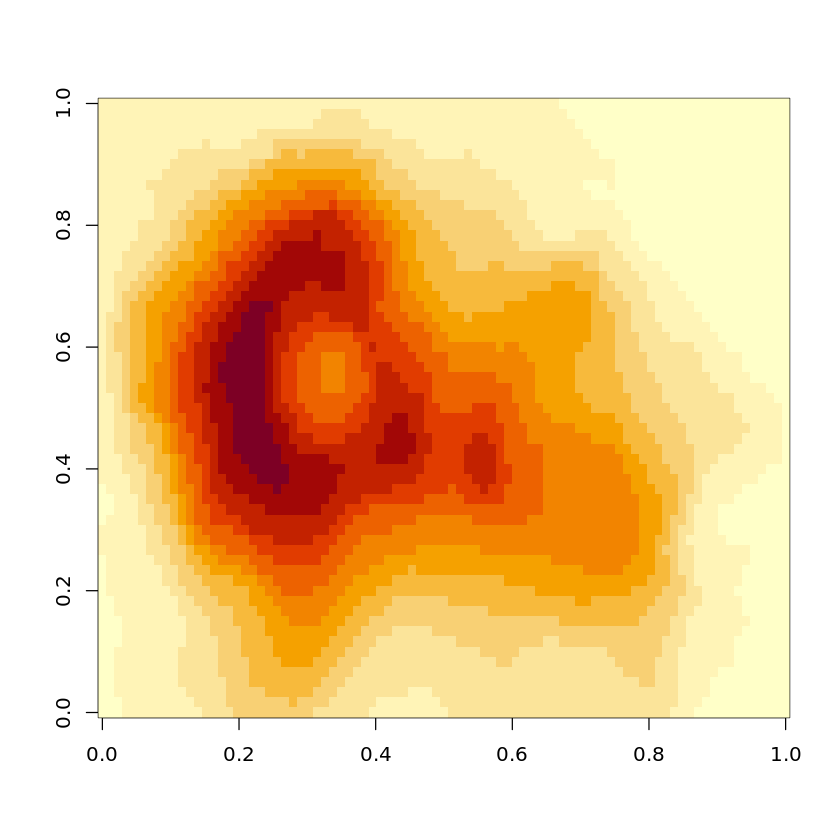

In [16]:
# Image data are stores in a matrix
# https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/image

image(volcano)

 [1] -12.5663706 -11.5997267 -10.6330828  -9.6664389  -8.6997950  -7.7331511
 [7]  -6.7665073  -5.7998634  -4.8332195  -3.8665756  -2.8999317  -1.9332878
[13]  -0.9666439   0.0000000   0.9666439   1.9332878   2.8999317   3.8665756
[19]   4.8332195   5.7998634   6.7665073   7.7331511   8.6997950   9.6664389
[25]  10.6330828  11.5997267  12.5663706
[1] 27 27
            [,1]        [,2]        [,3]         [,4]        [,5]
[1,] -0.00502329 -0.05525878  0.04486588  0.071168689  0.03395126
[2,] -0.05525878  0.03120585 -0.06114277 -0.018267052 -0.08652410
[3,]  0.04486588 -0.06114277  0.08137578  0.060674115  0.09805751
[4,]  0.07116869 -0.01826705  0.06067412 -0.004575801  0.09936265
[5,]  0.03395126 -0.08652410  0.09805751  0.099362650  0.10787324


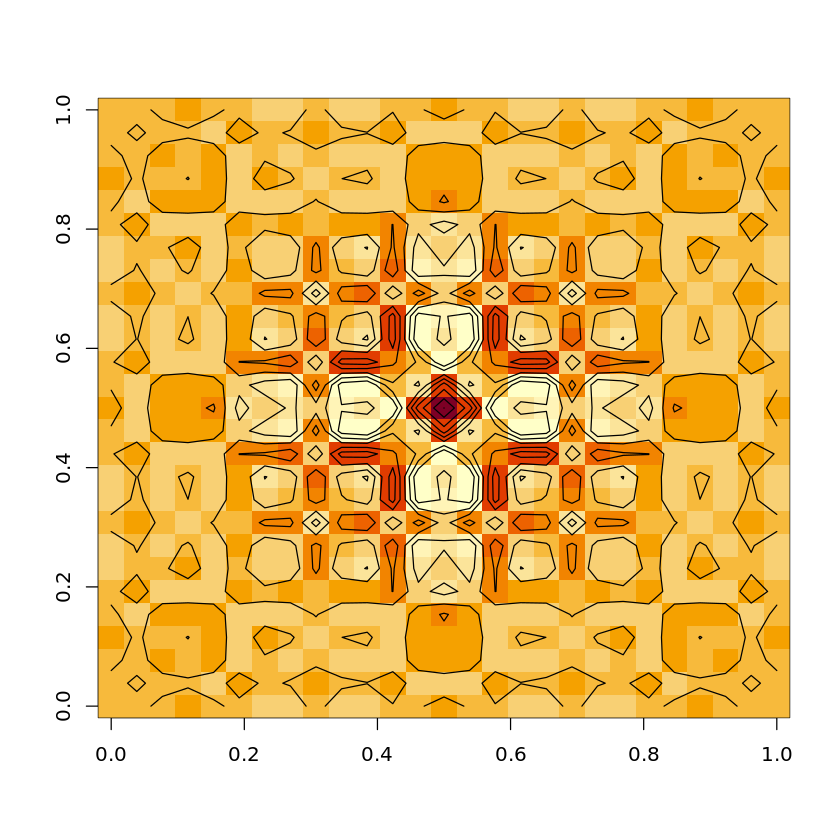

In [17]:
# Let's try to plot some function
x <- y <- seq(-4*pi, 4*pi, len = 27)
print(x)
r <- sqrt(outer(x^2, y^2, "+"))
print(dim(r))
z <- cos(r^2)*exp(-r/6)
print(z[1:5, 1:5])
image(z = z)
contour(z, add = TRUE, drawlabels = FALSE)

#### Matrix operations

In [18]:
mat1 <- matrix(1:6, 2)
mat2 <- matrix(c(rep(1, 3), rep(2, 3)), 2, byrow = T)

In [19]:
# Addition, subtraction
print(mat1 + mat2)
print(mat1 - 2)

     [,1] [,2] [,3]
[1,]    2    4    6
[2,]    4    6    8
     [,1] [,2] [,3]
[1,]   -1    1    3
[2,]    0    2    4


In [20]:
# Element-wise multiplication, division
print(mat1 * mat2)
print('______________')
print(mat1 * 3)
print('______________')
print(mat1 / mat2)

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    4    8   12
[1] "______________"
     [,1] [,2] [,3]
[1,]    3    9   15
[2,]    6   12   18
[1] "______________"
     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    1    2    3


In [21]:
# Transpose
print(mat2)
print(t(mat2))

     [,1] [,2] [,3]
[1,]    1    1    1
[2,]    2    2    2
     [,1] [,2]
[1,]    1    2
[2,]    1    2
[3,]    1    2


In [22]:
# Matrix multiplication, dimension of matrices must match, i.e. (dim(2,3) times dim(3,2))
print(mat1 %*% t(mat2))

     [,1] [,2]
[1,]    9   18
[2,]   12   24


<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Matrix_multiplication_diagram.svg/1920px-Matrix_multiplication_diagram.svg.png' width='500'>
</div>

In [23]:
# solve function
# solve(a: coefficients of the equation, b: vector or matrix of the equation)  
# it is a generic R function used to solving linear algebraic equations (a %*% x = b)
# https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/solve
# a: a square numeric or complex matrix containing the coefficients of the linear system. Logical matrices are coerced to numeric
# b: a numeric or complex vector or matrix giving the right-hand side(s) of the linear system. 
# If missing, b is taken to be an identity matrix and solve will return the inverse of a.
# Try
solve(5, 2) # a*5 = 2 -> a = 2/5 
a = 2/5
a

[1] 0.4

[1] 0.4

In [24]:
# Solve:
# 15x + 3y = 15
# 22x + 6y = 9

In [25]:
# Solution
# left side
A <- matrix(c(15, 22,        
              3, 6),
            nrow = 2)
print(A)
# right side
b <- matrix(c(12,           
              29),
            nrow = 2)
print(b)
print('Solution:')
print(solve(A,b))

     [,1] [,2]
[1,]   15    3
[2,]   22    6
     [,1]
[1,]   12
[2,]   29
[1] "Solution:"
       [,1]
[1,] -0.625
[2,]  7.125


Inverse<br>
Matrix needs to be square, non-singular (determinant != 0)<br>
https://collegedunia.com/exams/inverse-matrix-formula-concept-and-solved-examples-mathematics-articleid-1363<br>
![inverse](https://media.geeksforgeeks.org/wp-content/uploads/20200402114604/inv.png)

![inverse matrix](https://images.collegedunia.com/public/image/f400c1f4a3ce3345d087aa446dec1513.png?tr=w-500,h-94,c-force?tr=w-500,h-94,c-force)

In [26]:
mat3 <- matrix(c(3, 2, 5, 3, 2, 3, 6, 3, 4), 3)
print(mat3)
print('____________________________')
print(solve(mat3))

     [,1] [,2] [,3]
[1,]    3    3    6
[2,]    2    2    3
[3,]    5    3    4
[1] "____________________________"
           [,1] [,2]          [,3]
[1,]  0.1666667   -1  5.000000e-01
[2,] -1.1666667    3 -5.000000e-01
[3,]  0.6666667   -1 -1.480297e-17


### 4. Arrays
Objects that can store data in more than two dimensions, can store only one data type.

In [27]:
vec1 <- c(rep(3, 3))
vec2 <- 10:15

arr <- array(c(vec1,vec2),dim = c(3,3,2), dimnames = list(c('row 1', 'row 2', 'row 3'), 
                                                          c('col 1', 'col 2', 'col 3'),
                                                          c('mat 1', 'mat 2')))
print(arr)

, , mat 1

      col 1 col 2 col 3
row 1     3    10    13
row 2     3    11    14
row 3     3    12    15

, , mat 2

      col 1 col 2 col 3
row 1     3    10    13
row 2     3    11    14
row 3     3    12    15



In [28]:
# Accessing array elements

print('the 2nd row of the 2nd matrix of the array')
print(arr[2, , 2])
print('______________')
print('element in the 1st row and 2rd column of the 1st matrix')
print(arr[1, 2, 1])
print('______________')
print('the 2nd Matrix')
print(arr[ , , 2])

[1] "the 2nd row of the 2nd matrix of the array"
col 1 col 2 col 3 
    3    11    14 
[1] "______________"
[1] "element in the 1st row and 2rd column of the 1st matrix"
[1] 10
[1] "______________"
[1] "the 2nd Matrix"
      col 1 col 2 col 3
row 1     3    10    13
row 2     3    11    14
row 3     3    12    15


### 5. Dataframes
A Dataframe is a table like structure, where columns represents different variables and rows their respective values.

In [29]:
# https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [30]:
anim.data <- data.frame(
    anim_id = c (1:5), 
    animal = c('cat','dog','horse','whale', 'ostrich'),
    weight = c(3, 15, 400, 50000, 100), # whales differ from 5k to 15k
    diet = c('carnivore', 'carnivore', 'herbivore','plancton eater' ,'omnivore'),
    stringsAsFactors = FALSE
)
print(anim.data)

  anim_id  animal weight           diet
1       1     cat      3      carnivore
2       2     dog     15      carnivore
3       3   horse    400      herbivore
4       4   whale  50000 plancton eater
5       5 ostrich    100       omnivore


In [31]:
# Structure of the dataframe
str(anim.data)

'data.frame':	5 obs. of  4 variables:
 $ anim_id: int  1 2 3 4 5
 $ animal : chr  "cat" "dog" "horse" "whale" ...
 $ weight : num  3 15 400 50000 100
 $ diet   : chr  "carnivore" "carnivore" "herbivore" "plancton eater" ...


In [32]:
# Summary
print(summary(anim.data))  

    anim_id     animal              weight          diet          
 Min.   :1   Length:5           Min.   :    3   Length:5          
 1st Qu.:2   Class :character   1st Qu.:   15   Class :character  
 Median :3   Mode  :character   Median :  100   Mode  :character  
 Mean   :3                      Mean   :10104                     
 3rd Qu.:4                      3rd Qu.:  400                     
 Max.   :5                      Max.   :50000                     


In [33]:
print(summary(mtcars))  

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [34]:
# Extract specific columns
anim.data2 <- data.frame(anim.data$animal, anim.data$diet)
anim.data2
str(anim.data2)

anim.data.animal,anim.data.diet
<chr>,<chr>
cat,carnivore
dog,carnivore
horse,herbivore
whale,plancton eater
ostrich,omnivore


'data.frame':	5 obs. of  2 variables:
 $ anim.data.animal: chr  "cat" "dog" "horse" "whale" ...
 $ anim.data.diet  : chr  "carnivore" "carnivore" "herbivore" "plancton eater" ...


In [35]:
# or using [] notation, notice the difference in the names of the columns
anim.data2 <- data.frame(anim.data[, 2], anim.data[, 4])
anim.data2
str(anim.data2)

anim.data...2.,anim.data...4.
<chr>,<chr>
cat,carnivore
dog,carnivore
horse,herbivore
whale,plancton eater
ostrich,omnivore


'data.frame':	5 obs. of  2 variables:
 $ anim.data...2.: chr  "cat" "dog" "horse" "whale" ...
 $ anim.data...4.: chr  "carnivore" "carnivore" "herbivore" "plancton eater" ...


In [36]:
# Add new column
anim.data$domesticated <- c(T, T, T, F, F)
print(anim.data)

  anim_id  animal weight           diet domesticated
1       1     cat      3      carnivore         TRUE
2       2     dog     15      carnivore         TRUE
3       3   horse    400      herbivore         TRUE
4       4   whale  50000 plancton eater        FALSE
5       5 ostrich    100       omnivore        FALSE


In [37]:
# Add new row
new_row.data <- data.frame(anim_id = c(6), 
                           animal = c('komodo dragon'), 
                           weight = c(80), 
                           diet = c('carnivore'), 
                           domesticated = c(F),
                           stringsAsFactors = FALSE)
anim.data3 <- rbind(anim.data, new_row.data)
print(anim.data3)

  anim_id        animal weight           diet domesticated
1       1           cat      3      carnivore         TRUE
2       2           dog     15      carnivore         TRUE
3       3         horse    400      herbivore         TRUE
4       4         whale  50000 plancton eater        FALSE
5       5       ostrich    100       omnivore        FALSE
6       6 komodo dragon     80      carnivore        FALSE


### 6. Factors
Factors are objects for categorizing the data. They can store characters (strings), integers or boolean values. They are used in data analysis.

In [38]:
data <- c('mammal', 'mammal', 'mammal', 'mammal', 'bird', 'reptile' )
factor_data <- factor(data)
print(factor_data)
print(mode(factor_data)) # factors are internaly stored as numeric
print(mode(levels(factor_data)))
print(class(factor_data))

[1] mammal  mammal  mammal  mammal  bird    reptile
Levels: bird mammal reptile
[1] "numeric"
[1] "character"
[1] "factor"


In [39]:
anim.data3$anim_class <- factor_data
print(anim.data3)

print(is.factor(anim.data3$anim_class)) # let's check whether the column is indeed factor
print(anim.data3$anim_class)            # let's print the column to see the levels of the factor

  anim_id        animal weight           diet domesticated anim_class
1       1           cat      3      carnivore         TRUE     mammal
2       2           dog     15      carnivore         TRUE     mammal
3       3         horse    400      herbivore         TRUE     mammal
4       4         whale  50000 plancton eater        FALSE     mammal
5       5       ostrich    100       omnivore        FALSE       bird
6       6 komodo dragon     80      carnivore        FALSE    reptile
[1] TRUE
[1] mammal  mammal  mammal  mammal  bird    reptile
Levels: bird mammal reptile


In [40]:
# Change the order of levels in factor
factor_data_level_changed <- factor(factor_data, levels = c('reptile', 'mammal', 'bird'))
print(factor_data_level_changed)

[1] mammal  mammal  mammal  mammal  bird    reptile
Levels: reptile mammal bird


In [41]:
# Generate factor levels
# gl(n=int number of levels, k=int number of replication, labels)

factor_data_generated = gl(3, 2, labels = c('mammal', 'bird', 'reptile'))
print(factor_data_generated)

[1] mammal  mammal  bird    bird    reptile reptile
Levels: mammal bird reptile


### Simple regression example

In [42]:
# Get the data
url.wine <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine <- read.csv(url(url.wine), header = FALSE)
print(class(wine))
col.names <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                'Alcalinity', 'Magnesium', 'Phenols', 
                'Flavanoids', 'Nonflavanoids',
                'Proanthocyanins', 'Color', 'Hue', 
                'Dilution', 'Proline')
colnames(wine) <- col.names
wine$Type <- as.factor(wine$Type)
print(head(wine))

[1] "data.frame"
  Type Alcohol Malic  Ash Alcalinity Magnesium Phenols Flavanoids Nonflavanoids
1    1   14.23  1.71 2.43       15.6       127    2.80       3.06          0.28
2    1   13.20  1.78 2.14       11.2       100    2.65       2.76          0.26
3    1   13.16  2.36 2.67       18.6       101    2.80       3.24          0.30
4    1   14.37  1.95 2.50       16.8       113    3.85       3.49          0.24
5    1   13.24  2.59 2.87       21.0       118    2.80       2.69          0.39
6    1   14.20  1.76 2.45       15.2       112    3.27       3.39          0.34
  Proanthocyanins Color  Hue Dilution Proline
1            2.29  5.64 1.04     3.92    1065
2            1.28  4.38 1.05     3.40    1050
3            2.81  5.68 1.03     3.17    1185
4            2.18  7.80 0.86     3.45    1480
5            1.82  4.32 1.04     2.93     735
6            1.97  6.75 1.05     2.85    1450


\begin{align}
\beta = (X^{T}X)^{-1}(X^{T}Y)
\end{align}

\begin{align}
Y=Xβ+ϵ
\end{align}

![lin regression](https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/05mlr/eq_matrix_notation/index.gif)

In [49]:
y <- as.numeric(wine$Proanthocyanins)
# the first five values
y[1:5]

[1] 2.29 1.28 2.81 2.18 1.82

In [44]:
x <- as.matrix(cbind(wine$Magnesium, wine$Malic, wine$Ash, wine$Alcalinity, wine$Flavanoids))
class(x)
print(head(x))

[1] "matrix" "array"

     [,1] [,2] [,3] [,4] [,5]
[1,]  127 1.71 2.43 15.6 3.06
[2,]  100 1.78 2.14 11.2 2.76
[3,]  101 2.36 2.67 18.6 3.24
[4,]  113 1.95 2.50 16.8 3.49
[5,]  118 2.59 2.87 21.0 2.69
[6,]  112 1.76 2.45 15.2 3.39


In [45]:
# parameter estimates
beta.hat <- solve(t(x) %*% x) %*% t(x) %*% y #  solve(crossprod(data)) %*% crossprod(data, return)
print(c(beta.hat))

[1]  0.008395407  0.045420407 -0.334290415  0.029300169  0.425256761


[1] 2.089928 1.706878 1.985388 2.177914 1.908128 2.088197

[1] 2.29 1.28 2.81 2.18 1.82 1.97

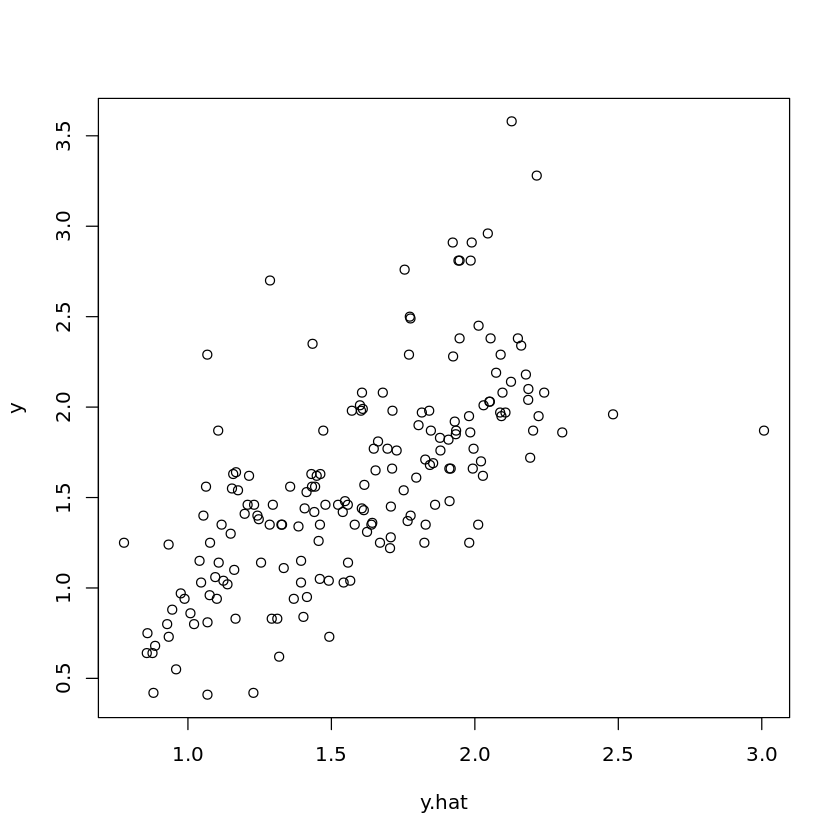

In [46]:
# compare the results estimates and true y
y.hat <- x %*% beta.hat
c(head(y.hat))
# Compare true and predicted values
head(y)
plot(y.hat, y)

In [50]:
# Let'c check whether we solved the linear regression correctly
input <- wine[,c('Magnesium', 'Malic', 'Ash', 'Alcalinity', 'Flavanoids', 'Proanthocyanins')]
reg = lm(formula = Proanthocyanins ~ Magnesium+Malic+Ash+Alcalinity+Flavanoids+0 , data = input)
reg
# Check ours parameters estimates
print(c(beta.hat))


Call:
lm(formula = Proanthocyanins ~ Magnesium + Malic + Ash + Alcalinity + 
    Flavanoids + 0, data = input)

Coefficients:
 Magnesium       Malic         Ash  Alcalinity  Flavanoids  
  0.008395    0.045420   -0.334290    0.029300    0.425257  


[1]  0.008395407  0.045420407 -0.334290415  0.029300169  0.425256761


[1] 2.089928 1.706878 1.985388 2.177914 1.908128 2.088197

[1] 2.089928 1.706878 1.985388 2.177914 1.908128 2.088197

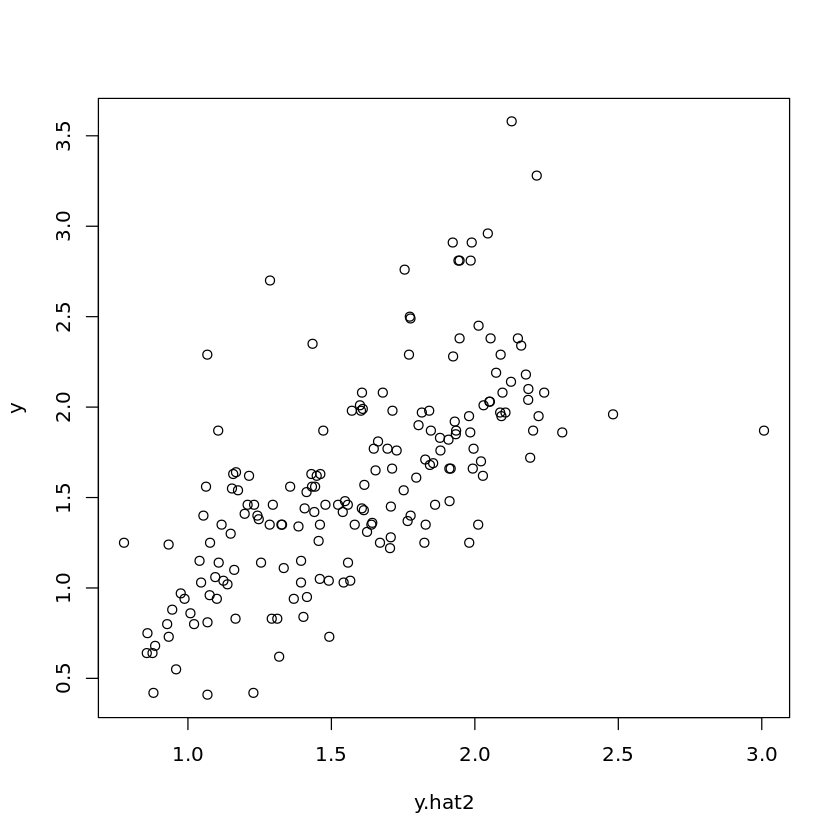

In [51]:
# And again compute the y estimates
beta.hat2 <- as.vector(summary(reg)$coefficients[1:5,1])
y.hat2 <- x %*% beta.hat
# Compare the y estimations
c(head(y.hat2))
c(head(y.hat))
plot(y.hat2, y)